# Examples visualizing different geometries

In [1]:
import infinite_conformal as infinite_conformal
import infinite_fourier as infinite_fourier
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import tqdm

## Basic example of potential with simple geometry

In [2]:
# declare geometry
epss=[1,5,2] # dielectric constant of layer 1, 2 and 3
t=[0.2] #thickness of layer 2
etas=[0.3,0] # cover fraction of electrodes, between layer 1 and 2 and between layer 2 and 3
# declare model parameters
LAcomp=2 # number of linear algebra componens
max_n=180 # number of fourier components
# make case
simple_geometry_case = infinite_fourier.multiple_recursive_images(etas,t,epss,epss,LAcomp,max_n,accuracy_limit=10**-15,hybrid=True)
print(simple_geometry_case.get_C(), 'F/m')

1.6549234995791352e-11 F/m


In [3]:
y=np.arange(-0.5,0.5001,0.01)
x=np.arange(-0.5,0.5001,0.01)
V_simple_geometry_case=np.zeros((len(y),len(x)))
for j in tqdm.tqdm(range(len(y))):
    v = simple_geometry_case.get_V(x,y[j])
    V_simple_geometry_case[j,:] += v

 42%|████▏     | 42/101 [00:00<00:00, 416.22it/s]/usr/local/lib/python3.6/site-packages/scipy/special/orthogonal.py:140: RuntimeWarning: invalid value encountered in multiply
  np.poly1d.__init__(self, poly.coeffs * float(kn))
/usr/local/lib/python3.6/site-packages/scipy/special/orthogonal.py:1977: RuntimeWarning: overflow encountered in double_scalars
  kn = _gam(2 * n + 1) / _gam(n + 1)**2 / 2.0**n
/usr/local/lib/python3.6/site-packages/scipy/special/orthogonal.py:1977: RuntimeWarning: invalid value encountered in double_scalars
  kn = _gam(2 * n + 1) / _gam(n + 1)**2 / 2.0**n
100%|██████████| 101/101 [00:00<00:00, 153.43it/s]


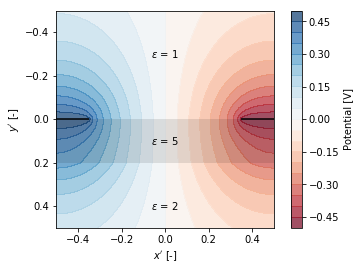

In [4]:
xx, yy = np.meshgrid(x, y)
fig, ax = plt.subplots(1,1)
# plot potential
levels=np.arange(-0.5,0.51,0.05)
CS=ax.contourf(xx,yy, V_simple_geometry_case,levels,cmap='RdBu',alpha=0.7)
cbar=fig.colorbar(CS, ax=ax)
ax.set_aspect('equal', 'box')
# set_labels 
ax.set_xlabel(r"$x'$ [-]")
ax.set_ylabel(r"$y'$ [-]")
cbar.set_label(r'Potential [V]')
# draw electrodes 
ax.plot([[-0.5,0.5],[-0.5+etas[0]/2,0.5-etas[0]/2]],[[0,0],[0,0]],'k',solid_capstyle='butt')
# shade the film 
ax.add_patch(matplotlib.patches.Rectangle(
            (-0.5,0),   # (x,y)
            1,          # width
            t[0],          # height
            facecolor=[0,0,0,0.1]))
# add dielectric constant
ax.text(0,-0.3,r'$\varepsilon$ = '+str(epss[0]), ha='center',va='center')
ax.text(0,t[0]/2,r'$\varepsilon$ = '+str(epss[1]), ha='center',va='center')
ax.text(0,0.4,r'$\varepsilon$ = '+str(epss[2]), ha='center',va='center')
# flip y axis
ax.invert_yaxis()

## Anisotropic film

In [32]:
# declare geometry
eps_x=[1,20,2] # in-plane dielectric constant of layer 1, 2 and 3
eps_y=[1,5,2] # out-of-plane dielectric constant of layer 1, 2 and 3
t=[0.2] #thickness of layer 2
etas=[0.3,0] # cover fraction of electrodes, between layer 1 and 2 and between layer 2 and 3
# declare model parameters
LAcomp=2 # number of linear algebra componens
max_n=180 # number of fourier components
# make case
anisotropy_case = infinite_fourier.multiple_recursive_images(etas,t,eps_x,eps_y,LAcomp,max_n,accuracy_limit=10**-15,hybrid=True)
print(anisotropy_case.get_C(), 'F/m')

3.319288371528966e-11 F/m


In [33]:
y=np.arange(-0.5,0.5001,0.01)
x=np.arange(-0.5,0.5001,0.01)
V_anisotropy_case=np.zeros((len(y),len(x)))
for j in tqdm.tqdm(range(len(y))):
    v = anisotropy_case.get_V(x,y[j])
    V_anisotropy_case[j,:] += v

100%|██████████| 101/101 [00:00<00:00, 728.85it/s]


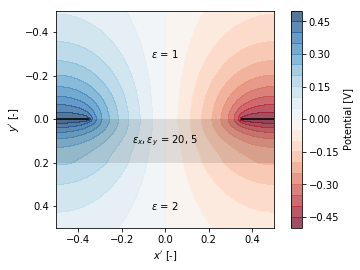

In [34]:
xx, yy = np.meshgrid(x, y)
fig, ax = plt.subplots(1,1)
# plot potential
levels=np.arange(-0.5,0.51,0.05)
CS=ax.contourf(xx,yy, V_anisotropy_case,levels,cmap='RdBu',alpha=0.7)
cbar=fig.colorbar(CS, ax=ax)
ax.set_aspect('equal', 'box')
# set_labels 
ax.set_xlabel(r"$x'$ [-]")
ax.set_ylabel(r"$y'$ [-]")
cbar.set_label(r'Potential [V]')
# draw electrodes 
ax.plot([[-0.5,0.5],[-0.5+etas[0]/2,0.5-etas[0]/2]],[[0,0],[0,0]],'k',solid_capstyle='butt')
# shade the film 
ax.add_patch(matplotlib.patches.Rectangle(
            (-0.5,0),   # (x,y)
            1,          # width
            t[0],          # height
            facecolor=[0,0,0,0.1]))
# add dielectric constant
ax.text(0,-0.3,r'$\varepsilon$ = '+str(eps_x[0]), ha='center',va='center')
ax.text(0,t[0]/2,r'$\varepsilon_x,\varepsilon_y$ = '+str(eps_x[1])+', '+str(eps_y[1]), ha='center',va='center')
ax.text(0,0.4,r'$\varepsilon$ = '+str(eps_x[2]), ha='center',va='center')
# flip y axis
ax.invert_yaxis()

## Multiple layers, bottom electrode

In [5]:
# declare geometry
epss=[1,5,2,1] # dielectric constant of layer 1, 2, 3 and 4 (below the continious electrode)
t=[0.1,0.2] #thickness of layer 2 and 3
etas=[0.3,0,1] # cover fraction of electrodes, between layer 1 and 2, between layer 2 and 3 and between layer 3 and 4
    # by setting the cover fractio to 1, the potential at the associated electrodes is automatically set to 0
# declare model parameters
LAcomp=[2,0,4] # number of linear algebra componens for the different interfaces
max_n=180 # number of fourier components
# make case
mlbe_case = infinite_fourier.multiple_recursive_images(etas,t,epss,epss,LAcomp,max_n,accuracy_limit=10**-15,hybrid=True)
print(mlbe_case.get_C(), 'F/m')

8.206625930901074e-12 F/m


In [6]:
y=np.arange(-0.5,0.5001,0.01)
x=np.arange(-0.5,0.5001,0.01)
V_mlbe_case=np.zeros((len(y),len(x)))
for j in tqdm.tqdm(range(len(y))):
    v = mlbe_case.get_V(x,y[j])
    V_mlbe_case[j,:] += v

 68%|██████▊   | 69/101 [00:00<00:00, 275.58it/s]/usr/local/lib/python3.6/site-packages/scipy/special/orthogonal.py:140: RuntimeWarning: invalid value encountered in multiply
  np.poly1d.__init__(self, poly.coeffs * float(kn))
/usr/local/lib/python3.6/site-packages/scipy/special/orthogonal.py:1977: RuntimeWarning: overflow encountered in double_scalars
  kn = _gam(2 * n + 1) / _gam(n + 1)**2 / 2.0**n
/usr/local/lib/python3.6/site-packages/scipy/special/orthogonal.py:1977: RuntimeWarning: invalid value encountered in double_scalars
  kn = _gam(2 * n + 1) / _gam(n + 1)**2 / 2.0**n
100%|██████████| 101/101 [00:01<00:00, 94.18it/s]


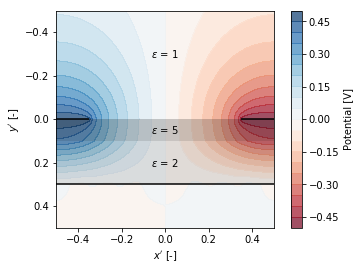

In [7]:
xx, yy = np.meshgrid(x, y)
fig, ax = plt.subplots(1,1)
# plot potential
levels=np.arange(-0.5,0.51,0.05)
CS=ax.contourf(xx,yy, V_mlbe_case,levels,cmap='RdBu',alpha=0.7)
cbar=fig.colorbar(CS, ax=ax)
ax.set_aspect('equal', 'box')
# set_labels 
ax.set_xlabel(r"$x'$ [-]")
ax.set_ylabel(r"$y'$ [-]")
cbar.set_label(r'Potential [V]')
# draw electrodes 
ax.plot([[-0.5,0.5],[-0.5+etas[0]/2,0.5-etas[0]/2]],[[0,0],[0,0]],'k',solid_capstyle='butt')
ax.plot([-0.5,0.5],[t[1]+t[0],t[1]+t[0]],'k',solid_capstyle='butt')
# shade the films
ax.add_patch(matplotlib.patches.Rectangle(
            (-0.5,0),   # (x,y)
            1,          # width
            t[0],          # height
            facecolor=[0,0,0,0.2]))
ax.add_patch(matplotlib.patches.Rectangle(
            (-0.5,t[0]),   # (x,y)
            1,          # width
            t[1],          # height
            facecolor=[0,0,0,0.1]))
# add dielectric constant
ax.text(0,-0.3,r'$\varepsilon$ = '+str(epss[0]), ha='center',va='center')
ax.text(0,t[0]/2,r'$\varepsilon$ = '+str(epss[1]), ha='center',va='center')
ax.text(0,t[1]/2+t[0],r'$\varepsilon$ = '+str(epss[2]), ha='center',va='center')
# flip y axis
ax.invert_yaxis()

## Electrodes both sides of film, symmetrical

In [8]:
# declare geometry
epss=[1,5,1] # dielectric constant of layer 1, 2, 3 and 4 (below the continious electrode)
t=[0.2] #thickness of layer 2 and 3
etas=[0.3,0.3] # cover fraction of electrodes, between layer 1 and 2, between layer 2 and 3 and between layer 3 and 4
# declare model parameters
LAcomp=[2,2] # number of linear algebra componens for the different interfaces
max_n=180 # number of fourier components
# make case
both_sides_case = infinite_fourier.multiple_recursive_images(etas,t,epss,epss,LAcomp,max_n,accuracy_limit=10**-15,hybrid=True)
print(both_sides_case.get_C(), 'F/m')

1.7973539448429468e-11 F/m


In [9]:
y=np.arange(-0.4,0.6001,0.01)
x=np.arange(-0.5,0.5001,0.01)
V_both_sides_case=np.zeros((len(y),len(x)))
for j in tqdm.tqdm(range(len(y))):
    v = both_sides_case.get_V(x,y[j])
    V_both_sides_case[j,:] += v

100%|██████████| 101/101 [00:00<00:00, 423.96it/s]


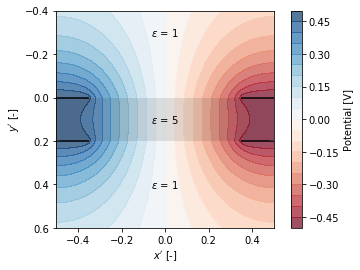

In [10]:
xx, yy = np.meshgrid(x, y)
fig, ax = plt.subplots(1,1)
# plot potential
levels=np.arange(-0.5,0.51,0.05)
CS=ax.contourf(xx,yy, V_both_sides_case,levels,cmap='RdBu',alpha=0.7)
cbar=fig.colorbar(CS, ax=ax)
ax.set_aspect('equal', 'box')
# set_labels 
ax.set_xlabel(r"$x'$ [-]")
ax.set_ylabel(r"$y'$ [-]")
cbar.set_label(r'Potential [V]')
# draw electrodes 
ax.plot([[-0.5,0.5],[-0.5+etas[0]/2,0.5-etas[0]/2]],[[0,0],[0,0]],'k',solid_capstyle='butt')
ax.plot([[-0.5,0.5],[-0.5+etas[0]/2,0.5-etas[0]/2]],[[t[0],t[0]],[t[0],t[0]]],'k',solid_capstyle='butt')
# shade the film 
ax.add_patch(matplotlib.patches.Rectangle(
            (-0.5,0),   # (x,y)
            1,          # width
            t[0],          # height
            facecolor=[0,0,0,0.1]))
# add dielectric constant
ax.text(0,-0.3,r'$\varepsilon$ = '+str(epss[0]), ha='center',va='center')
ax.text(0,t[0]/2,r'$\varepsilon$ = '+str(epss[1]), ha='center',va='center')
ax.text(0,0.4,r'$\varepsilon$ = '+str(epss[2]), ha='center',va='center')
# flip y axis
ax.invert_yaxis()

## Thick electrodes

In [12]:
# declare geometry
epss=[1,1,1,5,2] # dielectric constant of layer 1, 2, 3 and 4 (below the continious electrode)
t=[0.05,0.05,0.2] # multiple layers
etas=[0.3,0.3,0.3,0] # cover fraction of electrodes between layers
# declare model parameters
LAcomp=4 # number of linear algebra componens for the different interfaces
max_n=180 # number of fourier components
# make case
thicke_electrodes_case = infinite_fourier.multiple_recursive_images(etas,t,epss,epss,LAcomp,max_n,accuracy_limit=10**-15,hybrid=True)
print(thicke_electrodes_case.get_C(), 'F/m')

1.7998856789565858e-11 F/m


/usr/local/lib/python3.6/site-packages/scipy/special/orthogonal.py:140: RuntimeWarning: invalid value encountered in multiply
  np.poly1d.__init__(self, poly.coeffs * float(kn))


In [13]:
y=np.arange(-0.4,0.6001,0.01)
x=np.arange(-0.5,0.5001,0.01)
V_thicke_electrodes_case=np.zeros((len(y),len(x)))
for j in tqdm.tqdm(range(len(y))):
    v = thicke_electrodes_case.get_V(x,y[j])
    V_thicke_electrodes_case[j,:] += v

 29%|██▊       | 29/101 [00:00<00:00, 280.34it/s]/usr/local/lib/python3.6/site-packages/scipy/special/orthogonal.py:140: RuntimeWarning: invalid value encountered in multiply
  np.poly1d.__init__(self, poly.coeffs * float(kn))
/usr/local/lib/python3.6/site-packages/scipy/special/orthogonal.py:1977: RuntimeWarning: overflow encountered in double_scalars
  kn = _gam(2 * n + 1) / _gam(n + 1)**2 / 2.0**n
/usr/local/lib/python3.6/site-packages/scipy/special/orthogonal.py:1977: RuntimeWarning: invalid value encountered in double_scalars
  kn = _gam(2 * n + 1) / _gam(n + 1)**2 / 2.0**n
100%|██████████| 101/101 [00:01<00:00, 91.11it/s]


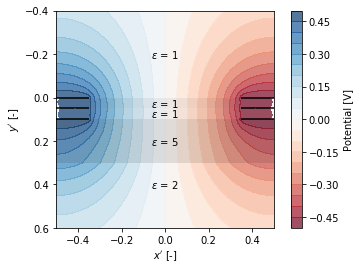

In [21]:
xx, yy = np.meshgrid(x, y)
fig, ax = plt.subplots(1,1)
# plot potential
levels=np.arange(-0.5,0.51,0.05)
CS=ax.contourf(xx,yy, V_thicke_electrodes_case,levels,cmap='RdBu',alpha=0.7)
cbar=fig.colorbar(CS, ax=ax)
ax.set_aspect('equal', 'box')
# set_labels 
ax.set_xlabel(r"$x'$ [-]")
ax.set_ylabel(r"$y'$ [-]")
cbar.set_label(r'Potential [V]')
# draw electrodes 
ax.plot([[-0.5,0.5],[-0.5+etas[0]/2,0.5-etas[0]/2]],[[0]*2]*2,'k',solid_capstyle='butt')
ax.plot([[-0.5,0.5],[-0.5+etas[0]/2,0.5-etas[1]/2]],[[t[0]]*2]*2,'k',solid_capstyle='butt')
ax.plot([[-0.5,0.5],[-0.5+etas[0]/2,0.5-etas[2]/2]],[[t[0]+t[1]]*2]*2,'k',solid_capstyle='butt')
# shade the film 
ax.add_patch(matplotlib.patches.Rectangle(
            (-0.5,0),   # (x,y)
            1,          # width
            t[0],          # height
            facecolor=[0,0,0,0.05]))
ax.add_patch(matplotlib.patches.Rectangle(
            (-0.5,t[0]),   # (x,y)
            1,          # width
            t[1],          # height
            facecolor=[0,0,0,0.03]))
ax.add_patch(matplotlib.patches.Rectangle(
            (-0.5,t[0]+t[1]),   # (x,y)
            1,          # width
            t[2],          # height
            facecolor=[0,0,0,0.1]))
# add dielectric constant
ax.text(0,-0.2,r'$\varepsilon$ = '+str(epss[0]), ha='center',va='center')
ax.text(0,t[0]/2,r'$\varepsilon$ = '+str(epss[1]), ha='center',va='center')
ax.text(0,t[0]+t[1]/2,r'$\varepsilon$ = '+str(epss[2]), ha='center',va='center')
ax.text(0,t[0]+t[1]+t[2]/2,r'$\varepsilon$ = '+str(epss[3]), ha='center',va='center')
ax.text(0,0.4,r'$\varepsilon$ = '+str(epss[4]), ha='center',va='center')
# flip y axis
ax.invert_yaxis()

## Electrodes both sides of film, asymmetrical = Quadrupole

In [53]:
# declare geometry
epss=[1,5,1] # dielectric constant of layer 1, 2, 3 and 4 (below the continious electrode)
t=[0.2] #thickness of layer 2 and 3
etas=[0.3,0.3] # cover fraction of electrodes, between layer 1 and 2, between layer 2 and 3 and between layer 3 and 4
# declare model parameters
LAcomp=[2,2] # number of linear algebra componens for the different interfaces
max_n=180 # number of fourier components
# make case
both_sides_case_asym = infinite_fourier.multiple_recursive_images(etas,t,epss,epss,LAcomp,max_n,accuracy_limit=10**-15,voltages=[0.5,-0.5],hybrid=True)
print('Capacitance between all left vs all right electrodes')
print(both_sides_case_asym.get_C(), '= ~0 F/m')
print('The capacitance of the quadrupole may be calculated by integrating the electric field')

Capacitance between all left vs all right electrodes
-6.462348535570529e-27 = ~0 F/m
The capacitance of the quadrupole may be calculated by integrating the electric field


In [54]:
y=np.arange(-0.4,0.6001,0.01)
x=np.arange(-0.5,0.5001,0.01)
V_both_sides_case_asym=np.zeros((len(y),len(x)))
for j in tqdm.tqdm(range(len(y))):
    v = both_sides_case_asym.get_V(x,y[j])
    V_both_sides_case_asym[j,:] += v

100%|██████████| 101/101 [00:00<00:00, 395.42it/s]


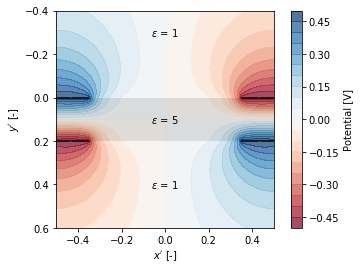

In [55]:
xx, yy = np.meshgrid(x, y)
fig, ax = plt.subplots(1,1)
# plot potential
levels=np.arange(-0.5,0.51,0.05)
CS=ax.contourf(xx,yy, V_both_sides_case_asym,levels,cmap='RdBu',alpha=0.7)
cbar=fig.colorbar(CS, ax=ax)
ax.set_aspect('equal', 'box')
# set_labels 
ax.set_xlabel(r"$x'$ [-]")
ax.set_ylabel(r"$y'$ [-]")
cbar.set_label(r'Potential [V]')
# draw electrodes 
ax.plot([[-0.5,0.5],[-0.5+etas[0]/2,0.5-etas[0]/2]],[[0,0],[0,0]],'k',solid_capstyle='butt')
ax.plot([[-0.5,0.5],[-0.5+etas[0]/2,0.5-etas[0]/2]],[[t[0],t[0]],[t[0],t[0]]],'k',solid_capstyle='butt')
# shade the film 
ax.add_patch(matplotlib.patches.Rectangle(
            (-0.5,0),   # (x,y)
            1,          # width
            t[0],          # height
            facecolor=[0,0,0,0.1]))
# add dielectric constant
ax.text(0,-0.3,r'$\varepsilon$ = '+str(epss[0]), ha='center',va='center')
ax.text(0,t[0]/2,r'$\varepsilon$ = '+str(epss[1]), ha='center',va='center')
ax.text(0,0.4,r'$\varepsilon$ = '+str(epss[2]), ha='center',va='center')
# flip y axis
ax.invert_yaxis()